In [168]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

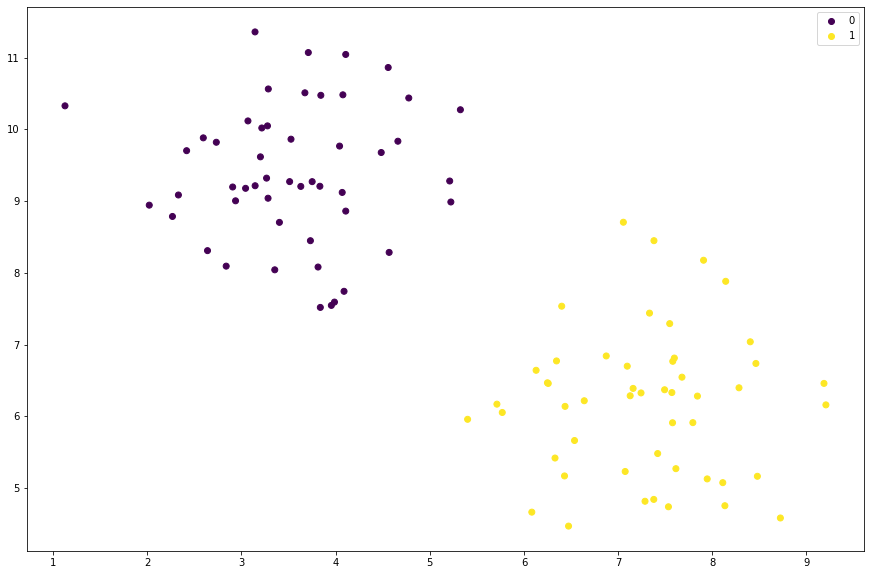

In [197]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=42)

plt.figure(figsize=(15,10))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])

In [199]:
class Perceptron:
    def __init__(self, learning_rate=1e-3):
        self.lr = learning_rate
        self.w = None

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        # добавляем константный признак
        ones = np.ones((x_train.shape[0], 1))
        x_train = np.hstack((ones, x_train))

        # инициализируем веса
        n_features = x_train.shape[1]
        self.w = np.zeros(n_features)

        # трансформируем y_train
        cls_map = np.where(y_train == 0, -1, 1)

        while True:
            counter = 0

            for i, x in enumerate(x_train):
                estimate = np.dot(x, self.w)

                if not np.sign(estimate) == cls_map[i]:
                    dw = - self.lr * np.dot(cls_map[i], x)
                    self.w -= dw
                    counter += 1

            if counter == 0:
                break

    def predict(self, x_test: np.ndarray):
        ones = np.ones((x_test.shape[0], 1))
        x_test = np.hstack((ones, x_test))
        estimate = np.dot(x_test, self.w)
        return np.where(np.sign(estimate) == -1, 0, 1)

In [200]:
model = Perceptron()
model.fit(X, y)

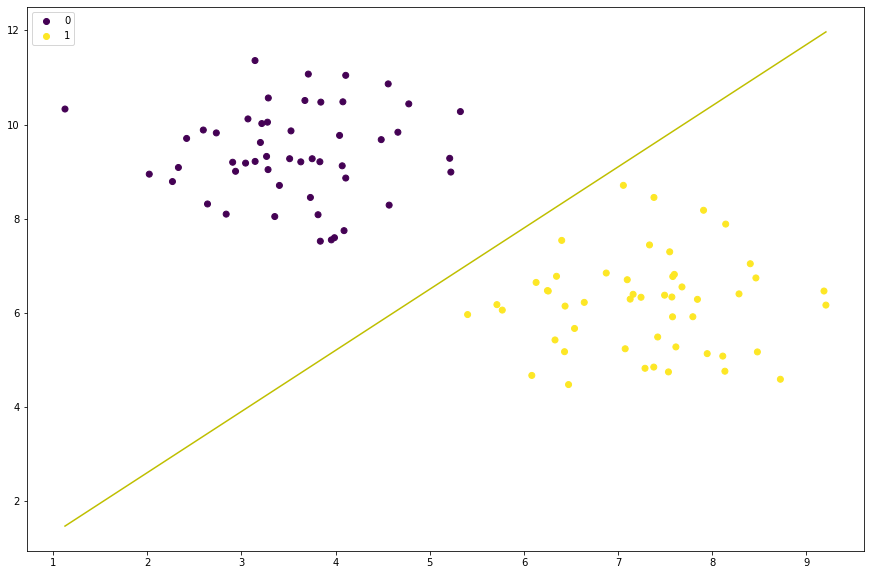

In [201]:
# Выводим результат работы перцептрона, должна получится разделяющая поверхность

plt.figure(figsize=(15,10))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])

x1 = np.array([min(X[:, 0]), max(X[:, 0])])
k = -model.w[1]/model.w[2]
b = -model.w[0]/model.w[2]
x2 = k*x1 + b

plt.plot(x1, x2, 'y-')